* Name: Sadig Gojayev  
* Neptun ID: T1LNLN 
* Dataset: Raccoon

# 1.Dataset

Downloading data from Google Drive

In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-6DXMctA-tkVRMC8jbCiXlbRVDoh6hAN' -O tmp.zip
!unzip -q tmp.zip && rm tmp.zip

--2022-12-02 18:42:07--  https://docs.google.com/uc?export=download&id=1-6DXMctA-tkVRMC8jbCiXlbRVDoh6hAN
Resolving docs.google.com (docs.google.com)... 74.125.195.101, 74.125.195.102, 74.125.195.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rtpc30ot3br6ehv9u74npe17rkjc5q75/1670006475000/17995030520773551043/*/1-6DXMctA-tkVRMC8jbCiXlbRVDoh6hAN?e=download&uuid=0389c3e1-faa4-4abf-89f8-a5cef3d6f9a5 [following]
--2022-12-02 18:42:08--  https://doc-08-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rtpc30ot3br6ehv9u74npe17rkjc5q75/1670006475000/17995030520773551043/*/1-6DXMctA-tkVRMC8jbCiXlbRVDoh6hAN?e=download&uuid=0389c3e1-faa4-4abf-89f8-a5cef3d6f9a5
Resolving doc-08-a0-docs.googleusercontent.com (doc-08-a0-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:

Reading annotation csv which is built in \\
VGG Image Annotator (via): https://www.robots.ox.ac.uk/~vgg/software/via/ \\
and creating txt file for each image

In [2]:
import pandas as pd

In [3]:
labels=pd.read_csv("./via_project_18Nov2022_1h27m_csv.csv")

In [4]:
labels

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,raccoon-1.jpg,58076,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":86,""y"":105,""width"":432,""hei...","{""name"":""raccoon""}"
1,raccoon-2.jpg,61817,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":86,""y"":66,""width"":371,""heig...","{""name"":""raccoon""}"
2,raccoon-3.jpg,85616,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":6,""y"":5,""width"":668,""height...","{""name"":""raccoon""}"
3,raccoon-4.jpg,30540,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":20,""y"":26,""width"":181,""heig...","{""name"":""raccoon""}"
4,raccoon-5.jpg,17400,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":32,""y"":5,""width"":226,""heigh...","{""name"":""raccoon""}"
...,...,...,...,...,...,...,...
101,raccoon-96.jpg,20668,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":61,""y"":48,""width"":133,""heig...","{""name"":""raccoon""}"
102,raccoon-97.jpg,82759,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":5,""y"":53,""width"":323,""heigh...","{""name"":""raccoon""}"
103,raccoon-98.jpg,22595,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":138,""y"":37,""width"":169,""hei...","{""name"":""raccoon""}"
104,raccoon-99.jpg,47711,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":24,""y"":46,""width"":105,""heig...","{""name"":""raccoon""}"


In [5]:
import os
import ast
import json
from PIL import Image

In [6]:
for i in range(1,101):
  with open(f'./raccoon/labels/raccoon-{str(i)}.txt', 'w') as f:
    for annot in labels[labels['filename']==f'raccoon-{str(i)}.jpg']['region_shape_attributes'].values:
      
      annot=json.loads(annot)
      # print(annot)
      im = Image.open(f'raccoon/images/raccoon-{str(i)}.jpg')
      width, height = im.size
      an_w=float(annot['width'])
      an_h=float(annot['height'])
      x_cen=float(annot['x'])+(an_w/2)
      y_cen=float(annot['y'])+(an_h/2)
      f.write(f"""0 {float("{:.6f}".format(x_cen/width))} {float("{:.6f}".format(y_cen/height))} {float("{:.6f}".format(an_w/width))} {float("{:.6f}".format(an_h/height))}""")
      # f.write("\n")
  f.close()

Train and Validation spliting of dataset 80:20 portion

In [7]:
%pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import splitfolders

In [9]:
splitfolders.ratio("raccoon", output="raccoon_data",
    seed=1337, ratio=(.8, .2, 0), group_prefix=None, move=False)

Copying files: 200 files [00:00, 3084.38 files/s]


Showing examples

In [10]:
from numpy import size
import cv2
import matplotlib.pyplot as plt

def plot_annot(image_path, label_path):
  img = cv2.imread(image_path)
  dh, dw, _ = img.shape

  fl = open(label_path, 'r')
  data = fl.readlines()
  fl.close()

  for dt in data:

      # Split string to float
      _, x, y, w, h = map(float, dt.split(' '))

      l = int((x - w / 2) * dw)
      r = int((x + w / 2) * dw)
      t = int((y - h / 2) * dh)
      b = int((y + h / 2) * dh)
      
      if l < 0:
          l = 0
      if r > dw - 1:
          r = dw - 1
      if t < 0:
          t = 0
      if b > dh - 1:
          b = dh - 1

      cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)

  plt.imshow(img)
  plt.gcf().set_size_inches(10, 6)
  plt.show()

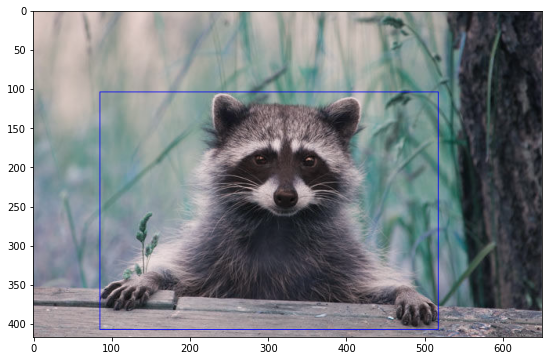

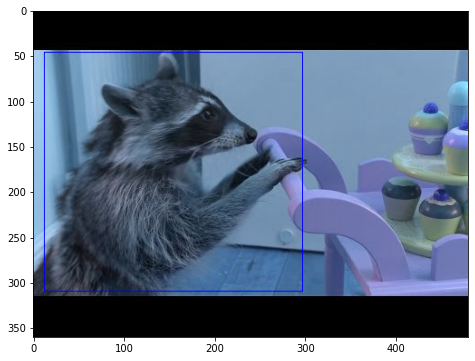

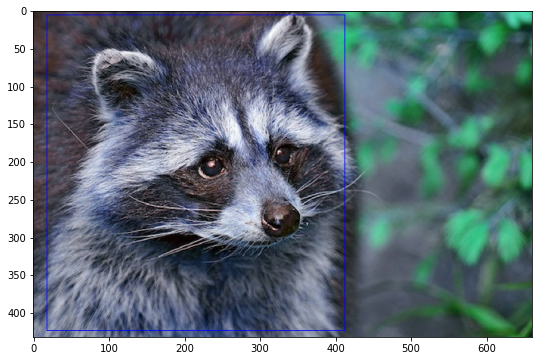

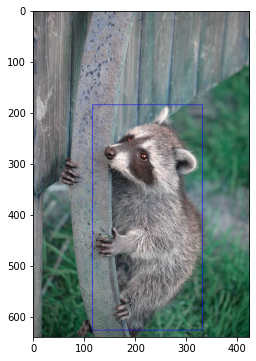

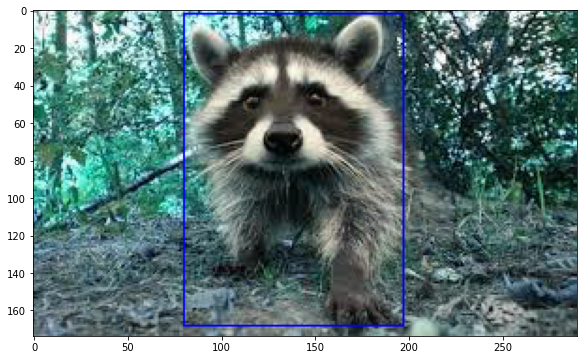

In [11]:
for i in range(1, 26, 5):
  plot_annot(image_path=f"raccoon/images/raccoon-{str(i)}.jpg", 
            label_path=f"raccoon/labels/raccoon-{str(i)}.txt")

# 2. Setup and train

In [12]:
!git clone https://github.com/WongKinYiu/yolov7 # clone repo
%cd yolov7
#%pip install -qr requirements.txt  # install dependencies

Cloning into 'yolov7'...
remote: Enumerating objects: 1094, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1094 (delta 0), reused 0 (delta 0), pack-reused 1091
Receiving objects: 100% (1094/1094), 69.85 MiB | 24.18 MiB/s, done.
Resolving deltas: 100% (522/522), done.
/content/yolov7


Dumping yaml file of raccoon dataset into data folder of model

In [13]:
import yaml

dict_file = {
    "train": "../raccoon_data/train", 
    "val": "../raccoon_data/val",  
    "test": "./raccoon_data/test",
    "nc": 1, 
    "names": ['raccoon']
 }

with open(r'./data/raccoon.yaml', 'w') as file:
    documents = yaml.dump(dict_file, file)

Train YOLOv7 on Racoon for 20 epochs

In [14]:
!python train.py --epochs 20 --weights yolov7.pt --data "data/raccoon.yaml" --workers 8 --batch-size 16 --device 0 --img 320 --cfg cfg/training/yolov7.yaml --name yolov7 --hyp data/hyp.scratch.p5.yaml

YOLOR 🚀 v0.1-116-g8c0bf3f torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7.yaml', data='data/raccoon.yaml', device='0', entity=None, epochs=20, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[320, 320], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov7', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='yolov7.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warm

# 3. Log results

In [17]:
import IPython.display

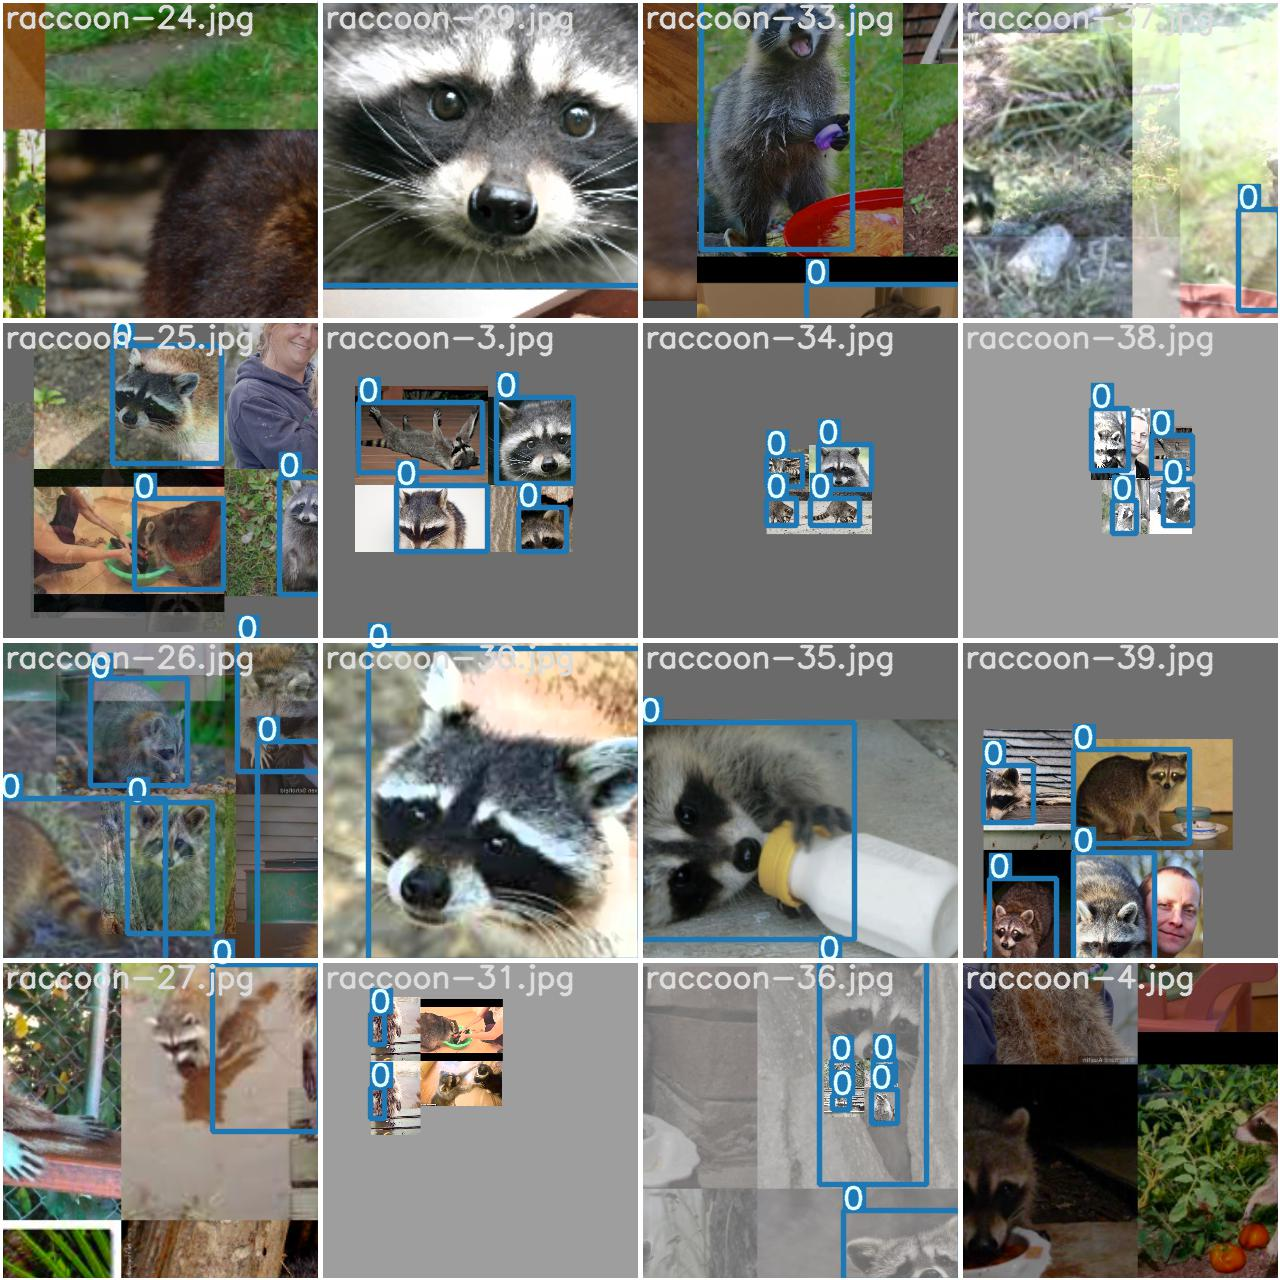

In [18]:
IPython.display.Image(filename='runs/train/yolov7/train_batch6.jpg', width=800)  # train batch 6 mosaics and labels

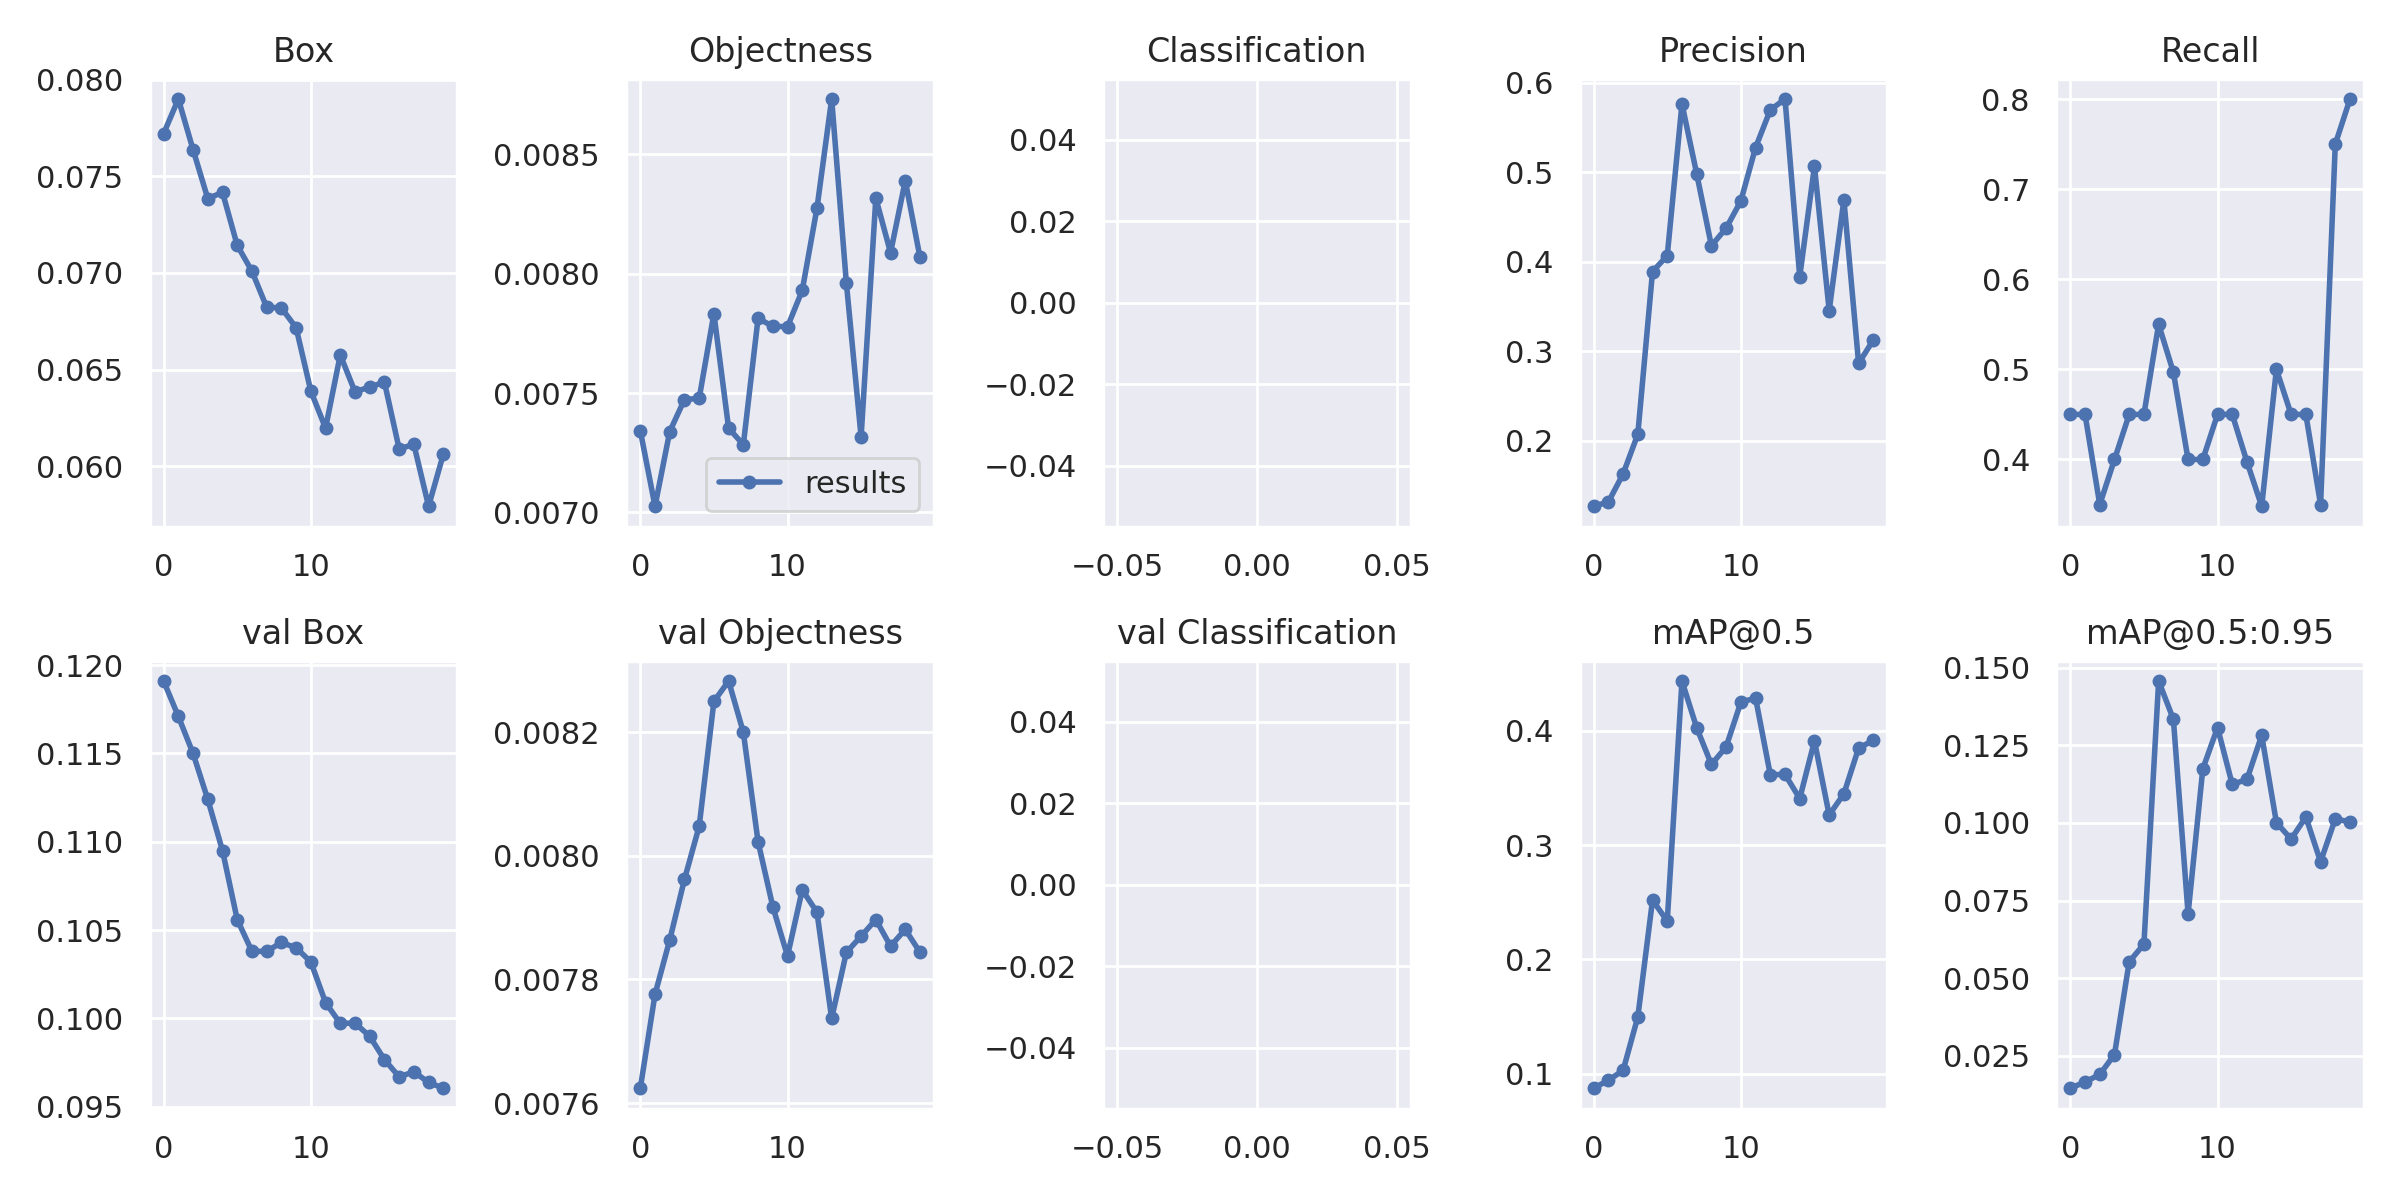

In [19]:
IPython.display.Image(filename='runs/train/yolov7/results.png', width=800)

mAp is around 0.4, I think it is good score since it was just 80 images for training.

# 4. Using

In [20]:
!python detect.py --weights runs/train/yolov7/weights/best.pt --source "../raccoon/images/raccoon-47.jpg"

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='../raccoon/images/raccoon-47.jpg', update=False, view_img=False, weights=['runs/train/yolov7/weights/best.pt'])
YOLOR 🚀 v0.1-116-g8c0bf3f torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1

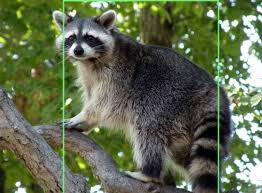

In [21]:
IPython.display.Image(filename='runs/detect/exp/raccoon-47.jpg', width=800)